<div style="display: flex; align-items: center; justify-content: center; background: linear-gradient(to right, #006241, #e6efec); padding: 10px;">
    <img src="https://www.starbucks.co.id/image/logo.png" alt="Starbucks Logo" style="width: 55px; margin-right: 10px;">
    <h1 style="-webkit-text-fill-color: white; font-size: 29px; margin: 0;">Starbucks Capstone Challenge</h1>
</div>

### Table of Contents:

I. **[Introduction by Udacity](#I.)**

II. **[Data Sets by Udacity](#II.)**

III. **[Work Progress by Student: Bernhard A. Alphama](#III.)**

1. **[Introduction by Student](#1.)**

    - 1.1. [Understanding the Problem](#1.1.)


2. **[Exploratory Data](#2.)**
    
    - 2.1. [Data Understanding](#2.1.)


3. **[Data Preprocessing](#3.)**
    
    - [3.1. Data Cleaning](#3.1.)
        - 3.1.1. [Merge Profile and Transcript Datasets](#3.1.1.)
        - 3.1.2. [Correct Data Types and Formats](#3.1.2.)
        - 3.1.3. [Merge with Portfolio Dataset](#3.1.3.)
        - 3.1.4. [Turning Categorical Data into Numerical for Analysis](#3.1.4.)
        - 3.1.5. [Separate into different datasets](#3.1.5.)


4. **[Answering Business Questions](#4.)**
    
    - 4.1. [Q1: Which type of offer is the most popular among customers?](#4.1.)<br><br>
        - 4.1.1. [Findings 1: Discount Offers Are More Popular](#4.1.1.)<br><br>

    - 4.2. [Q2: Do different groups of customers react differently to offers?](#4.2.)<br><br>
        - 4.2.1. [Findings 2: Usage of Offers by Gender and Customer Loyalty](#4.2.1.)<br><br>

    - 4.3. [Q3: Do customers usually see an offer before using it, or do they use it without noticing?](#4.3.)<br><br>
        - 4.3.1. [Findings 3: Relationship between Offer Completion and Offer Viewing over Time](#4.3.1.)<br><br>

    - 4.4. [Q4: Is there a group of customers who are more likely to use an offer or make a purchase without seeing the offer?](#4.4.)<br><br>
        - 4.4.1. [Findings 4: Demographic Comparison - Accidental Offer Usage](#4.4.1.)<br><br>

    - 4.5. [Q5: If there is, which type of offer is more likely to be used without being seen?](#4.5.)<br><br>
        - 4.5.1. [Findings 5: Offer Effectiveness](#4.5.1.)


5. **[Modeling: Predicting Customer Behavior](#5.)**
    
    - 5.1. [Creating Dataset for Modeling](#5.1.)
    - 5.2. [Model Building and Evaluation using Logistic Regression](#5.2.)
    - 5.3. [Temporary Conclusion (1)](#5.3.)
    - 5.4. [Improvements using Downsampling](#5.4.)
    - 5.5. [Temporary Conclusion (2)](#5.5.)
    - 5.6. [Improvements using LightGBM (Light Gradient Boosting Machine)](#5.6.)
    - 5.7. [Temporary Conclusion (3)](#5.7.)


6. **[Final Conclusions](#6.)**


7. **[Future Improvements](#7.)**


8. **[Closure](#8.)**


9. **[Acknowledgments](#9.)**

### I. Introduction by Udacity <a name="I."></a>

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

### II. Data Sets by Udacity<a name="II."></a>

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

### III. Work Progress by Student: Bernhard A. Alphama<a name="III."></a>

### 1. Introduction by Student<a name="1."></a>

### 1.1. Understanding the Problem<a name="1.1."></a>

In this analysis, we'll find answers to important business questions related to customer behavior and offer effectiveness. Here are questions that we can listed:

- Q1: Which type of offer is the most popular among customers?
- Q2: Do different groups of customers react differently to offers?
- Q3: Do customers usually see an offer before using it, or do they use it without notice?
- Q4: Is there a group customers who more likely use an offer or make purchase without seeing offer?
- Q5: Which type of offer's more likely used without being seen?

To keep things focused, We'll look at two offers:
1. BOGO (Buy One Get One)
2. Discount offer.

I'll measure success based on:

- 1. Got clear answers to all business questions we've listed.
- 2. Build machine learning that can predict which customers are more likely to take offers without viewing.
- 3. Improve machine learning model to get better performance on prediction.
- 4. Summarize model's effectiveness in identify customers who likely waste the offers and optimize the targeting of offers.
- 5. Give conclusions and recommendations for Starbucks to improve their offer strategy.

By answering questions and using data-driven approaches, hope I get valuable insights into customer behavior and offer effectiveness. This project should help business make informed decisions, improve marketing strategies, and customer satisfaction.

### 2. Exploratory Data<a name="2."></a>

### 2.1. Data Understanding<a name="2.1."></a>

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
profile = pd.read_json('data/profile.json', orient='records', lines=True)
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
# Print the first five rows of the portfolio DataFrame
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [3]:
# Print the first five rows of the profile DataFrame
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [4]:
# Print the first five rows of the transcript DataFrame
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [5]:
profile.info()
profile.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [6]:
portfolio.info()
portfolio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [7]:
transcript.info()
transcript.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


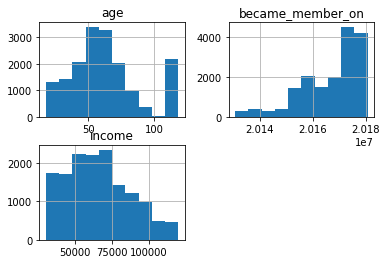

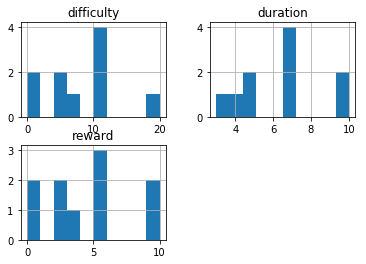

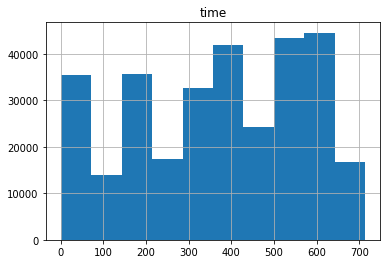

In [8]:
profile.hist();
portfolio.hist();
transcript.hist();

### 3. Data Preprocessing<a name="3."></a>

### 3.1. Data Cleaning<a name="3.1."></a>

### 3.1.1. Merge Profile and Transcript Datasets<a name="3.1.1."></a>

This allows us to bring together the demographic information from the Profile dataset with the transactional data from the Transcript dataset.

In [9]:
#merge the two dataset
merge_df = transcript.merge(profile, left_on='person', right_on='id', how='outer')

merge_df.head()

,event,person,time,value,age,became_member_on,gender,id,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,{'amount': 19.89},75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,{'amount': 17.78},75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0


### 3.1.2. Correct Data Types and Formats<a name="3.1.2."></a>

This step ensures that the data is represented in the appropriate format for analysis and avoids any inconsistencies or errors in the data.

In [10]:
def clean_df(merge_df):
    clean_df = merge_df[merge_df['gender'].notnull()].copy() #drop null values
    clean_df.drop('id', axis=1, inplace=True) #drop the repeated column after combine
    
    #change became_member_on to datetime formate
    clean_df['became_member_on'] = pd.to_datetime(clean_df['became_member_on'], format='%Y%m%d')
    
    # create a new column that has the year which customers become members
    clean_df['year'] = clean_df['became_member_on'].apply(lambda x: str(x)[:4])
    
    #change the time in hours to days, rounding up
    clean_df['days'] = clean_df['time'].apply(lambda x: int(x / 24) + (x % 24 > 0))
    
    #clean the value column
    clean_df['offer_id'] = clean_df['value'].apply(lambda x: x['offer id'] if 'offer id' in x else x['offer_id'] if 'offer_id' in x else np.nan)
    clean_df['amount'] = clean_df['value'].apply(lambda x: x.get('amount', 0))
    clean_df.drop(['value'], axis=1, inplace=True)
    
    clean_df = clean_df.reset_index(drop=True)
    
    return clean_df

clean_df = clean_df(merge_df)
clean_df.head()
    

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,75,2017-05-09,F,100000.0,2017,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,75,2017-05-09,F,100000.0,2017,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,75,2017-05-09,F,100000.0,2017,6,NaN,19.89
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,75,2017-05-09,F,100000.0,2017,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,75,2017-05-09,F,100000.0,2017,6,NaN,17.78


### 3.1.3. Merge with Portfolio Dataset<a name="3.1.3."></a>

By merging the clean_df with the portfolio dataset, we combine the offer characteristics with the customer transaction data, enabling us to analyze the effectiveness of different offers and their impact on customer behavior.

In [11]:
#merge the three datasets
all_df = clean_df.merge(portfolio, left_on='offer_id', right_on='id', how='outer')
all_df.drop(['id'], axis=1, inplace=True) #drop the repeated column
all_df.sample(5)

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,amount,channels,difficulty,duration,offer_type,reward
194663,offer completed,e8fb6c8da3794b2ab602b065b3435f43,384,42,2015-10-02,M,67000.0,2015,16,2906b810c7d4411798c6938adc9daaa5,0.00,"[web, email, mobile]",10.0,7.0,discount,2.0
181817,offer completed,790b4a1a2c104f9ebbb17375640a6e4f,648,53,2017-08-02,M,53000.0,2017,27,f19421c1d4aa40978ebb69ca19b0e20d,0.00,"[web, email, mobile, social]",5.0,5.0,bogo,5.0
98178,transaction,d57fa2ef85d24235bf3860fe97c4ad08,402,80,2017-12-23,M,61000.0,2017,17,NaN,0.75,NaN,NaN,NaN,NaN,NaN
125881,transaction,f68b320c815e4ce0a9ce55da0f1009bc,654,18,2017-10-25,M,51000.0,2017,28,NaN,13.30,NaN,NaN,NaN,NaN,NaN
101163,transaction,3001246acc004275b4a08a37fa8785fd,24,60,2016-04-19,F,62000.0,2016,1,NaN,23.52,NaN,NaN,NaN,NaN,NaN


In [12]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 16 columns):
event               272762 non-null object
person              272762 non-null object
time                272762 non-null int64
age                 272762 non-null int64
became_member_on    272762 non-null datetime64[ns]
gender              272762 non-null object
income              272762 non-null float64
year                272762 non-null object
days                272762 non-null int64
offer_id            148805 non-null object
amount              272762 non-null float64
channels            148805 non-null object
difficulty          148805 non-null float64
duration            148805 non-null float64
offer_type          148805 non-null object
reward              148805 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 35.4+ MB


### 3.1.4. Turning Categorical Data into Numerical for Analysis<a name="3.1.4."></a>

To facilitate the analysis, we convert certain categorical data into numerical format. This conversion allows us to perform calculations and statistical operations on these variables. Here are the categorical variables and their corresponding numerical representations:

**event:**
<br>0: 'offer received'
<br>1: 'offer viewed'
<br>2: 'offer completed'
<br>3: 'transaction'

**gender:**
<br>0: 'F'
<br>1: 'M'
<br>3: 'O'

**channels:**
<br>0: ['web', 'email']
<br>1: ['email', 'mobile', 'social']
<br>2: ['web', 'email', 'mobile']
<br>3: ['web', 'email', 'mobile', 'social']

**offer_type:**
<br>0: 'bogo'
<br>2: 'informational'
<br>3: 'discount'

**year:**
<br>0: '2013'
<br>1: '2014'
<br>2: '2015'
<br>3: '2016'
<br>4: '2017'
<br>5: '2018'

By converting these categorical variables into numerical representations, we can effectively analyze their relationships with other numerical variables and derive meaningful insights from the data.

In [13]:
print(all_df['gender'].unique())
print(all_df['offer_type'].unique())
print(all_df['event'].unique())
print(all_df['year'].unique())

['F' 'M' 'O']
['bogo' nan 'informational' 'discount']
['offer received' 'offer viewed' 'offer completed' 'transaction']
['2017' '2018' '2015' '2016' '2014' '2013']


In [14]:
def categorical_to_numeric(df, cols):
    """
    Convert categorical variables in a DataFrame to numeric representation.

    Args:
        df (DataFrame): The input DataFrame.
        cols (list): A list of column names that are categorical variables and need to be converted into integers.
                     The order of the categorical variables does not matter.

    Returns:
        DataFrame: The modified DataFrame with the original columns and additional columns that represent the
                   converted categorical variables as numbers. The numbers only indicate different categories, not orders.
    """
    for col in cols:
        # Get all the unique categories in the column
        array = df[col].unique()
        
        # Get the number of categories
        value_nums = len(array)
        
        # Create a new column
        df[col+'_id'] = df[col]

        for i in range(value_nums):
            # Replace the variable with a number in the newly created column
            df[col+'_id'] = np.where(df[col] == array[i], i, df[col+'_id'])
    
    return df

In [15]:
def clean_all_categorical(df, cols):
    """
    Clean categorical columns in the given DataFrame and convert them into numerical representation.

    Args:
        df (DataFrame): The input DataFrame to be cleaned.
        cols (list): A list of column names that are categorical variables and need to be converted into integers.
                     The order of the categorical variables does not matter.

    Returns:
        DataFrame: The modified DataFrame with the original columns and additional columns that represent the
                   converted categorical variables as numbers.

    Example usage:
        cleaned_df = clean_all_categorical(df, ['gender', 'event', 'offer_type', 'year', 'channels'])
    """
    cleaned_df = categorical_to_numeric(df, cols)

    # Convert years to numerical representation
    years = df['year'].unique()
    year_sorted = sorted([int(x) for x in years])
    cleaned_df['year_id'] = df['year']
    for i in range(len(year_sorted)):
        cleaned_df['year_id'] = np.where(cleaned_df['year_id'] == str(year_sorted[i]), i, cleaned_df['year_id'])

    # Convert channels to numerical representation
    col = 'channels'
    channel_type_id = df[col].copy()
    for x in range(len(df)):
        if df[col][x] == ['web', 'email', 'mobile', 'social']:
            channel_type_id[x] = 3
        elif df[col][x] == ['web', 'email', 'mobile']:
            channel_type_id[x] = 2
        elif df[col][x] == ['email', 'mobile', 'social']:
            channel_type_id[x] = 1
        elif df[col][x] == ['web', 'email']:
            channel_type_id[x] = 0

    cleaned_df['channel_type_id'] = channel_type_id

    return cleaned_df

In [16]:
all_clean = clean_all_categorical(all_df,
                                  ['gender',
                                   'offer_type',
                                   'event',
                                   'year'
                                  ])

all_clean.sample(5)

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,...,channels,difficulty,duration,offer_type,reward,gender_id,offer_type_id,event_id,year_id,channel_type_id
265639,offer received,6317f18c59d54a429d8d2dc2998bd394,576,70,2017-04-07,F,103000.0,2017,24,4d5c57ea9a6940dd891ad53e9dbe8da0,...,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,0,0,0,4,3
39870,transaction,35055ff4289447df8c93739196163b01,714,48,2018-05-06,F,72000.0,2018,30,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,3,5,NaN
123436,transaction,a091725845c84b5d99ebe066c5d18b34,474,80,2017-02-03,M,75000.0,2017,20,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,3,4,NaN
5184,offer completed,53426d80b1f7435284264b934478a750,528,72,2016-11-06,F,66000.0,2016,22,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,"[web, email, mobile]",5.0,7.0,bogo,5.0,0,0,2,3,2
228884,offer received,5ecaea5c8bf44ae4a65838d9d066c909,168,55,2018-03-03,F,97000.0,2018,7,2298d6c36e964ae4a3e7e9706d1fb8c2,...,"[web, email, mobile, social]",7.0,7.0,discount,3.0,0,3,0,5,3


### 3.1.5. Seperate into different datasets<a name="3.1.5."></a>

By separating the data into different datasets, we can perform targeted analysis and gain insights into specific aspects from the data related.

In [17]:
# Selects only the rows where the 'offer_id' column is not null, indicating that those rows contain offer records
offer_records_df = all_clean[all_clean['offer_id'].notnull()]

# selects only the rows where the 'offer_type_id' column is either 0 or 3, indicating that those rows correspond to BOGO (buy one, get one) and discount offer types.
bogo_discount_df = all_clean.loc[(all_clean['offer_type_id'] == 0) | (all_clean['offer_type_id'] == 3)]


In [18]:
offer_records_df.sample(5)

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,...,channels,difficulty,duration,offer_type,reward,gender_id,offer_type_id,event_id,year_id,channel_type_id
12679,offer completed,f875599b198d4e42b4c14c6e39e02b83,456,60,2018-05-11,F,100000.0,2018,19,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,"[web, email, mobile]",5.0,7.0,bogo,5.0,0,0,2,5,2
152387,offer received,886a279ebca346daa13bcfd1aa0d8fae,408,50,2016-09-13,F,75000.0,2016,17,ae264e3637204a6fb9bb56bc8210ddfd,...,"[email, mobile, social]",10.0,7.0,bogo,10.0,0,0,0,3,1
228309,offer viewed,841eb4e9167b4ba88e77906ff60d4b5f,336,53,2017-10-23,M,84000.0,2017,14,2298d6c36e964ae4a3e7e9706d1fb8c2,...,"[web, email, mobile, social]",7.0,7.0,discount,3.0,1,3,1,4,3
147115,offer received,646797fb6f194a698086d585c7d60cc3,168,39,2017-03-28,M,61000.0,2017,7,5a8bc65990b245e5a138643cd4eb9837,...,"[email, mobile, social]",0.0,3.0,informational,0.0,1,2,0,4,1
9983,offer completed,6d6c0aa032064438b97ab5dc28fd1b61,78,33,2017-09-15,F,72000.0,2017,4,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,"[web, email, mobile]",5.0,7.0,bogo,5.0,0,0,2,4,2


In [19]:
bogo_discount_df.sample(5)

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,...,channels,difficulty,duration,offer_type,reward,gender_id,offer_type_id,event_id,year_id,channel_type_id
167418,offer completed,4c1c14245a1f4b138ae662fe2243342f,504,68,2017-11-26,F,50000.0,2017,21,f19421c1d4aa40978ebb69ca19b0e20d,...,"[web, email, mobile, social]",5.0,5.0,bogo,5.0,0,0,2,4,3
248762,offer received,9dc8d4bad3c748739faf22da974b8d1f,504,93,2018-03-19,F,92000.0,2018,21,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"[web, email]",20.0,10.0,discount,5.0,0,3,0,5,0
222561,offer completed,58ad7189fe54463fa221873e553f3173,168,90,2018-01-01,F,72000.0,2018,7,fafdcd668e3743c1bb461111dcafc2a4,...,"[web, email, mobile, social]",10.0,10.0,discount,2.0,0,3,2,5,3
262289,offer viewed,57b9d3a0e2ba40969ce4caf7b98fd2f6,18,49,2017-02-26,M,73000.0,2017,1,4d5c57ea9a6940dd891ad53e9dbe8da0,...,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,1,0,1,4,3
250323,offer received,acb84e878c0a40c3b998fe143e66d426,0,79,2017-09-19,M,60000.0,2017,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,"[web, email]",20.0,10.0,discount,5.0,1,3,0,4,0


### 4. Answering Business Questions<a name="4."></a>

The goal of this analysis is to identify strategies to avoid giving offers that are used without being viewed. We aim to understand customer behavior and preferences related to offers, with a focus on minimizing wasteful spending on unviewed offers.

- Q1: Which type of offer is the most popular among customers?
- Q2: Do different groups of customers react differently to offers?
- Q3: Do customers usually see an offer before using it, or do they use it without noticing?
- Q4: Is there a group of customers who are more likely to use an offer or make a purchase without seeing the offer?
- Q5: If there is, which type of offer is more likely to be used without being seen?

Additionally, we want to assess the purchasing behavior of certain demographic groups when they are not receiving any offers. This will provide insights into their baseline spending patterns and help us better understand their preferences and needs.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

### 4.1. Q1: Which type of offer is the most popular among customers?<a name="4.1."></a>

In [21]:
print('The total counts of different events for BOGO offer are:')
bogo_counts = all_clean[all_clean['offer_type'] == 'bogo']['event'].value_counts()
print(bogo_counts)


print('\nThe total counts of different events for discount offer are:')
discount_counts = all_clean[all_clean['offer_type'] == 'discount']['event'].value_counts()
print(discount_counts)

The total counts of different events for BOGO offer are:
offer received     26537
offer viewed       22039
offer completed    15258
Name: event, dtype: int64

The total counts of different events for discount offer are:
offer received     26664
offer viewed       18461
offer completed    17186
Name: event, dtype: int64


Text(0.5,1,'Totoal counts of 0-BOGO offer vs. 3-discount offer\n')

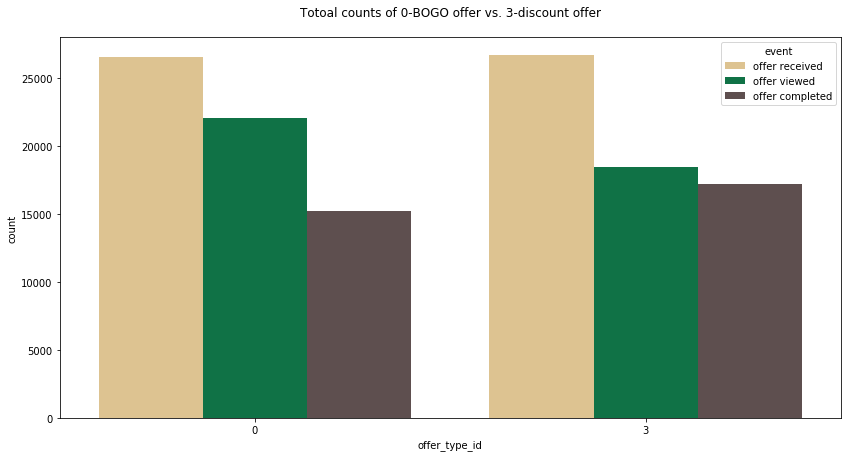

In [22]:
# Define custom color palette
starbucks = ["#eac784", "#008248", "#604c4c", "#f0cddb", "#6B9997"]
sns.set_palette(sns.color_palette(starbucks))

# Create a figure countplot
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x="offer_type_id", hue="event", data=bogo_discount_df,)
plt.title("Totoal counts of 0-BOGO offer vs. 3-discount offer\n")

In [23]:
def event_counts(df):
    """
    Calculate the counts of each individual event in a DataFrame.

    Args:
        df (DataFrame): The input DataFrame containing event data.

    Yields:
        int: The count of each individual event.

    Example:
        There are 3 different events in this dataset - offer completed, offer viewed, and offer received.
        The function will yield 3 integers representing the total counts of each of these events.
    """
    events = df['event_id'].unique()
    for event in events:
        count = len(df[df['event_id'] == event])
        yield count


In [24]:
# Dataframe with only bogo offer
bogo = bogo_discount_df[bogo_discount_df['offer_type_id']==0]

# Get counts for BOGO offer
bogo_counts = list(event_counts(bogo))

bogo_counts

[26537, 22039, 15258]

In [25]:
# Dataframe with only discount offer
discount = bogo_discount_df[bogo_discount_df['offer_type_id']==3]

# Get counts for discount offer
discount_counts = list(event_counts(discount))

discount_counts

[26664, 18461, 17186]

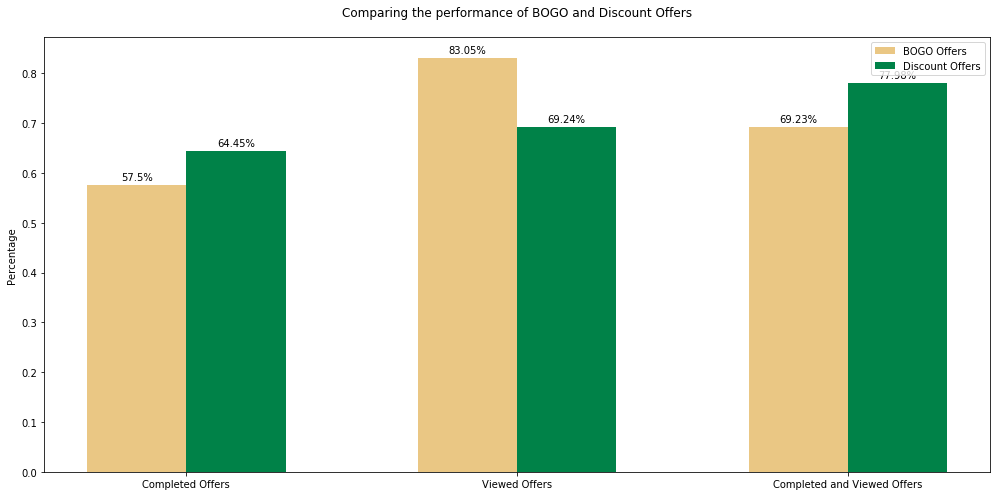

In [26]:
"""
Plot the performance comparison between BOGO and discount offers in terms of percentage.

Args:
    bogo_df (DataFrame): DataFrame containing BOGO offer data.
    discount_df (DataFrame): DataFrame containing discount offer data.

Returns:
    None. The plot comparing the performance of BOGO and discount offers is displayed.

"""

# Calculate performance percentages
bogo_performance = [bogo_counts[2] / bogo_counts[0], bogo_counts[1] / bogo_counts[0], bogo_counts[2] / bogo_counts[1]]
discount_performance = [discount_counts[2] / discount_counts[0], discount_counts[1] / discount_counts[0], discount_counts[2] / bogo_counts[1]]

# Set the labels for the x-axis
labels = ['Completed Offers', 'Viewed Offers', 'Completed and Viewed Offers']

# Set the position and width of the bars
x = np.arange(len(labels))
width = 0.30

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the bars for BOGO and discount offers with custom colors
rects1 = ax.bar(x - width/2, bogo_performance, width, label='BOGO Offers')
rects2 = ax.bar(x + width/2, discount_performance, width, label='Discount Offers')

# Add labels, title, and legend
ax.set_ylabel('Percentage')
ax.set_title('Comparing the performance of BOGO and Discount Offers\n')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to annotate the heights of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{round(height * 100, 2)}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate the heights of the bars
autolabel(rects1)
autolabel(rects2)

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()

### 4.1.1. Findings 1: Discount Offers Are More Popular<a name="4.1.1."></a>

Based on the analysis, it has been found that discount offers are more popular compared to BOGO (buy one, get one) offers. The following observations support this finding:

- **Higher Completion Rate:** The absolute number of 'offer completed' for discount offers is slightly higher than BOGO offers. This indicates that more customers successfully complete the purchase when a discount offer is provided.

- **Higher Completed-to-Received Rate:** The overall completed/received rate for discount offers is around 6.95% higher than BOGO offers. This suggests that customers are more likely to take advantage of and complete a purchase when presented with a discount offer.

- **Greater Visibility for BOGO Offers:** Despite the higher completion rate and completed/received rate for discount offers, it is important to note that BOGO offers have a significantly higher chance of being viewed or seen by customers. This indicates that BOGO offers may attract more attention and generate curiosity among customers.

### 4.2. Q2: Do different groups of customers react differently to offers?<a name="4.2."></a>

Text(0.5,1,'Pairplot of 7000 BOGO offer sampels')

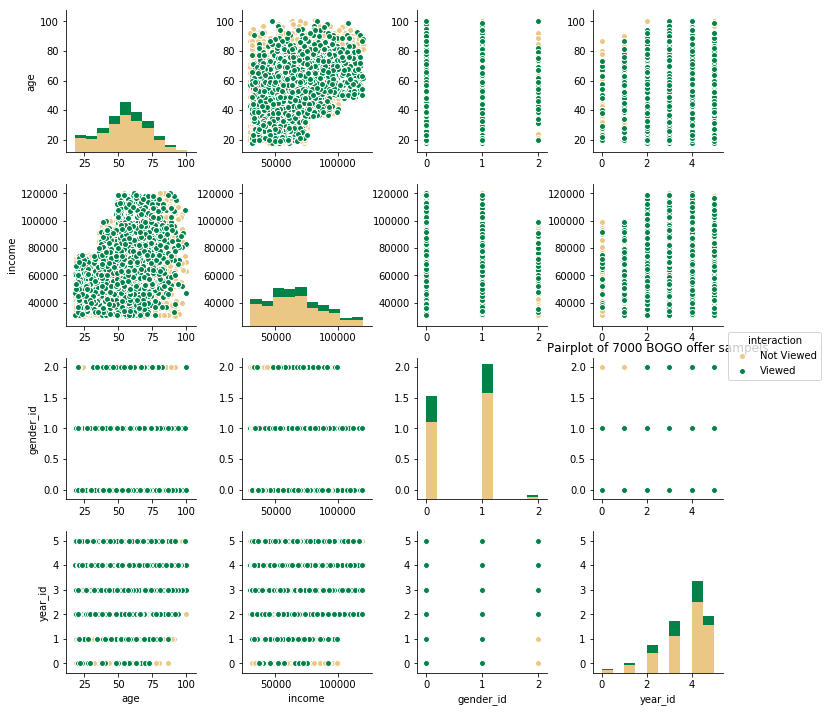

In [27]:
# Sample 7000 BOGO offer records
df_bogo = bogo.sample(n=7000, random_state=42).copy()

# Create a binary interaction variable based on event_id
df_bogo["interaction"] = np.where(df_bogo["event_id"] == 2, "Viewed", "Not Viewed")

# Select the columns for pair plot
df_bogo2 = df_bogo[["interaction", "age", "income", "gender_id", "year_id"]]

# Set the title of the pair plot
sns.pairplot(df_bogo2, hue="interaction", palette=starbucks)
plt.title('Pairplot of 7000 BOGO offer sampels')

Text(0.5,1,'Pairplot of 7000 Discount Offer Samples')

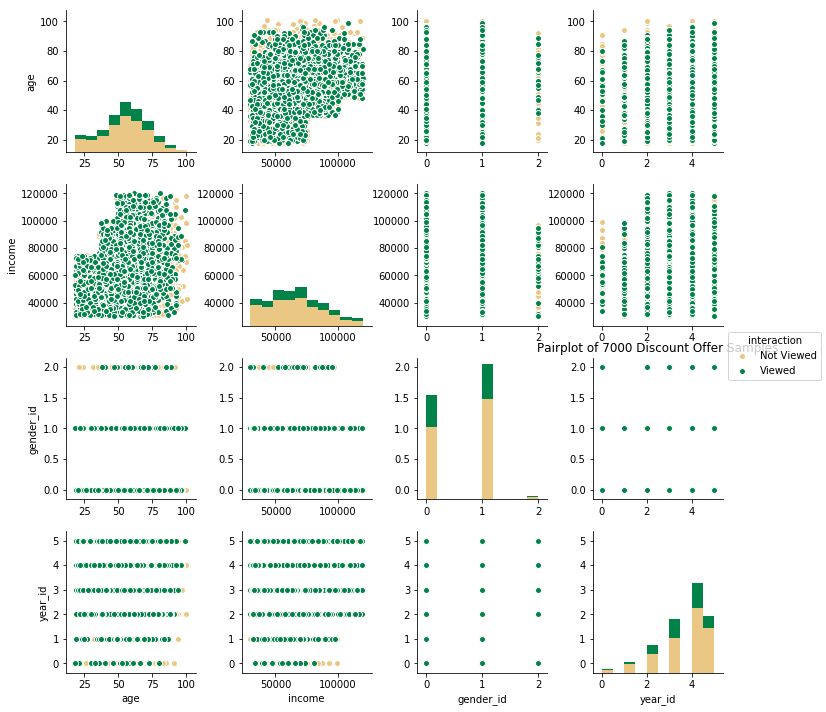

In [28]:
# Sample 7000 discount offer records
df_discount = discount.sample(n=7000, random_state=42).copy()

# Create a binary interaction variable based on event_id
df_discount["interaction"] = np.where(df_discount["event_id"] == 2, "Viewed", "Not Viewed")

# Select the columns for pair plot
df_discount2 = df_discount[["interaction", "age", "income", "gender_id", "year_id"]]

# Set the title of the pair plot
sns.pairplot(df_discount2, hue="interaction", palette=starbucks)
plt.title('Pairplot of 7000 Discount Offer Samples')

### 4.2.1. Findings 2: Usage of Offers by Gender and Customer Loyalty<a name="4.2.1."></a>

- Men have a significantly lower chance of using both BOGO and discount offers compared to women.

- More loyal customers who have joined 5-6 years also show a significantly lower chance of using both offer types.

- When comparing the two offers, women tend to use BOGO offers slightly more, while men show a higher preference for discount offers.

### 4.3. Q3: Do customers usually see an offer before using it, or do they use it without noticing?<a name="4.3."></a>

In [29]:
bogo_discount_df['interacted'] = 1

person_offer = bogo_discount_df.groupby(['person', 'days', 'event'])['interacted'].max().unstack(fill_value=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'count')

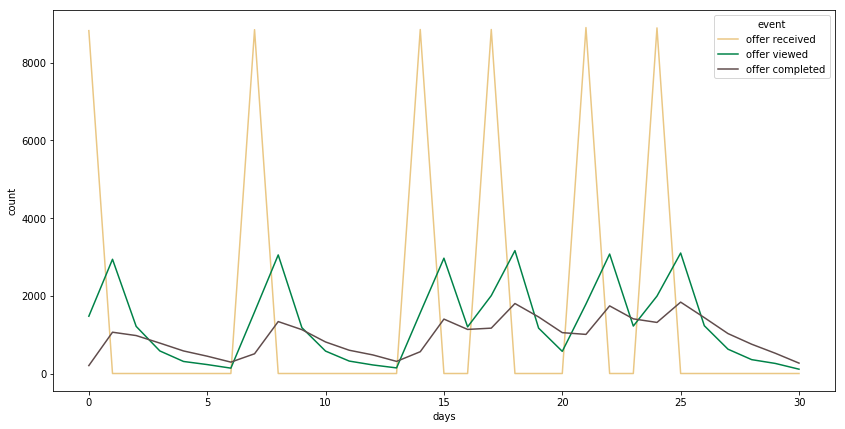

In [30]:
events = list(bogo_discount_df['event'].unique())
ax = person_offer.groupby('days')[events].sum().plot(figsize=(14, 7))
ax.set_xlabel('days')
ax.set_ylabel('count')

### 4.3.1. Findings 3: Relationship between Offer Completion and Offer Viewing over Time<a name="4.3.1."></a>

- The peak of offer completed are slightly before the peak of offer viewed during the first 5 days experiment.

- As time goes by, offer completed and offer viewed becomes more synchronized, its indicate that majority of people using the offers consciously.

- The time gap between offer completed and offer viewed also decreases, suggesting that customers become more familiar with the promotional campaigns.

### 4.4. Q4: Is there a group of customers who are more likely to use an offer or make a purchase without seeing the offer?<a name="4.4."></a>

In [31]:
print(bogo_discount_df.index)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            272752, 272753, 272754, 272755, 272756, 272757, 272758, 272759,
            272760, 272761],
           dtype='int64', length=126145)


In [32]:
# Select the first 2 interactions a person had with each offer.
recent_interactions = bogo_discount_df.sort_values('time').groupby(['person', 'offer_id']).tail(2)
recent_interactions.sample(5)

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,...,difficulty,duration,offer_type,reward,gender_id,offer_type_id,event_id,year_id,channel_type_id,interacted
8630,offer received,83b27ffbd87341f1acb229d4f7983642,0,36,2014-08-20,M,62000.0,2014,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,5.0,7.0,bogo,5.0,1,0,0,1,2,1
11313,offer received,1ecaa4a4ecd046e7bd41d3858041244b,336,20,2018-02-12,F,32000.0,2018,14,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,5.0,7.0,bogo,5.0,0,0,0,5,2,1
237744,offer received,3a9a6ee0506c49dcbad7ce26a99cb90d,408,61,2018-04-17,M,34000.0,2018,17,2298d6c36e964ae4a3e7e9706d1fb8c2,...,7.0,7.0,discount,3.0,1,3,0,5,3,1
229229,offer viewed,74fcd98b46fc47cba9423e23ce0b294f,204,30,2016-04-18,M,48000.0,2016,9,2298d6c36e964ae4a3e7e9706d1fb8c2,...,7.0,7.0,discount,3.0,1,3,1,3,3,1
172272,offer completed,48417b7360864a43b62877fc15d17af8,630,80,2017-04-05,F,66000.0,2017,27,f19421c1d4aa40978ebb69ca19b0e20d,...,5.0,5.0,bogo,5.0,0,0,2,4,3,1


In [33]:
#demonstration of the dataset for 1 user
recent_interactions[recent_interactions['person'] == '55103915b4bf48d1b8b51117f426dcb5']

,event,person,time,age,became_member_on,gender,income,year,days,offer_id,...,difficulty,duration,offer_type,reward,gender_id,offer_type_id,event_id,year_id,channel_type_id,interacted
192491,offer received,55103915b4bf48d1b8b51117f426dcb5,336,49,2017-08-31,M,82000.0,2017,14,2906b810c7d4411798c6938adc9daaa5,...,10.0,7.0,discount,2.0,1,3,0,4,2,1
192492,offer viewed,55103915b4bf48d1b8b51117f426dcb5,354,49,2017-08-31,M,82000.0,2017,15,2906b810c7d4411798c6938adc9daaa5,...,10.0,7.0,discount,2.0,1,3,1,4,2,1
251635,offer completed,55103915b4bf48d1b8b51117f426dcb5,594,49,2017-08-31,M,82000.0,2017,25,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,20.0,10.0,discount,5.0,1,3,2,4,0,1
219215,offer completed,55103915b4bf48d1b8b51117f426dcb5,594,49,2017-08-31,M,82000.0,2017,25,fafdcd668e3743c1bb461111dcafc2a4,...,10.0,10.0,discount,2.0,1,3,2,4,3,1
219214,offer completed,55103915b4bf48d1b8b51117f426dcb5,594,49,2017-08-31,M,82000.0,2017,25,fafdcd668e3743c1bb461111dcafc2a4,...,10.0,10.0,discount,2.0,1,3,2,4,3,1
251636,offer viewed,55103915b4bf48d1b8b51117f426dcb5,696,49,2017-08-31,M,82000.0,2017,29,0b1e1539f2cc45b7b9fa7c272da2e1d7,...,20.0,10.0,discount,5.0,1,3,1,4,0,1


In [34]:
# Dataset with users first interaction
# first_interaction = recent_interactions.sort_values('time').groupby(['person', 'offer_id']).min()
# first_interaction.to_pickle("./first_interaction.pkl")

In [35]:
# Dataset with users second interaction
# second_interaction = recent_interactions.sort_values('time').groupby(['person', 'offer_id']).min()
# second_interaction.to_pickle("./second_interaction.pkl")

In [36]:
first_interaction = pd.read_pickle("./first_interaction.pkl")
second_interaction = pd.read_pickle("./second_interaction.pkl")

In [37]:
# Select users who received an offer and completed it without viewing
received_offer = first_interaction[first_interaction['event'] == 'offer received']
completed_offer = second_interaction[second_interaction['event'] == 'offer completed']

# A list of [person, offer_id] whose first interaction with the offer was 'offer received'
received_offer_list = []

# A list of [person, offer_id] whose second interaction with the offer was 'offer completed'
completed_offer_list = []

# Populate received_offer_list with [person, offer_id] pairs whose first interaction was 'offer received'
for x in range(len(received_offer)):
    person = received_offer.index[x]
    received_offer_list.append(person)

# Populate completed_offer_list with [person, offer_id] pairs whose second interaction was 'offer completed'
for y in range(len(completed_offer)):
    person = completed_offer.index[y]
    completed_offer_list.append(person)

print(received_offer_list[0], completed_offer_list[0])

('0020c2b971eb4e9188eac86d93036a77', 'ae264e3637204a6fb9bb56bc8210ddfd') ('0009655768c64bdeb2e877511632db8f', '2906b810c7d4411798c6938adc9daaa5')


In [38]:
from collections import Counter

# Take out only the person ids from received_offer_list
person_ids_1 = [received_offer_list[x][0] for x in range(len(received_offer_list))]

# Take out only the person ids from completed_offer_list
person_ids_2 = [completed_offer_list[x][0] for x in range(len(completed_offer_list))]

# Find the people that exist in both person_ids_1 and person_ids_2
common_person_ids = Counter(person_ids_1) & Counter(person_ids_2)

# A list of people who completed an offer without viewing it
person_list = list(common_person_ids.keys())

In [39]:
# We want to study these people. Therefore, we label them in the profile dataset
profile['complete_no_view'] = np.where(profile['id'].isin(person_list), 1, 0)

# Display a random sample of the profile dataset
profile.sample(5)

,age,became_member_on,gender,id,income,complete_no_view
5898,60,20150801,M,ad05dadd098c46cba692bb37e5fd739e,92000.0,0
14160,81,20180625,F,11b036bfa2cc4671bf7c338bf5be3784,70000.0,1
11342,46,20170125,F,fb0cb6991c80471e985a625af2bfde8f,88000.0,0
12428,49,20171123,M,6367775d7ee246e6b027a6272f379508,84000.0,1
3587,25,20170121,M,3ff6de008af14b92ae5ce70dc89fb2b4,61000.0,1


In [40]:
def clean_profile(df):
    '''
    Clean the profile dataset by removing rows with missing gender values and transforming the 'became_member_on' column.

    Args:
        df (DataFrame): Input DataFrame containing the profile data.

    Returns:
        clean_df (DataFrame): Cleaned DataFrame with null values removed and 'became_member_on' column transformed.

    '''
    # Drop rows with null gender values
    clean_df = df[df['gender'].notnull()].copy()
    
    # Convert 'became_member_on' to datetime format
    clean_df['became_member_on'] = pd.to_datetime(clean_df['became_member_on'], format='%Y%m%d')
    
    # Create a new column 'year' with the year in which customers became members
    clean_df['year'] = clean_df['became_member_on'].apply(lambda x: str(x)[:4])

    return clean_df


clean_profile = clean_profile(profile)
clean_profile.head()

,age,became_member_on,gender,id,income,complete_no_view,year
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,0,2017
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,2017
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,1,2018
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,0,2018
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1,2017


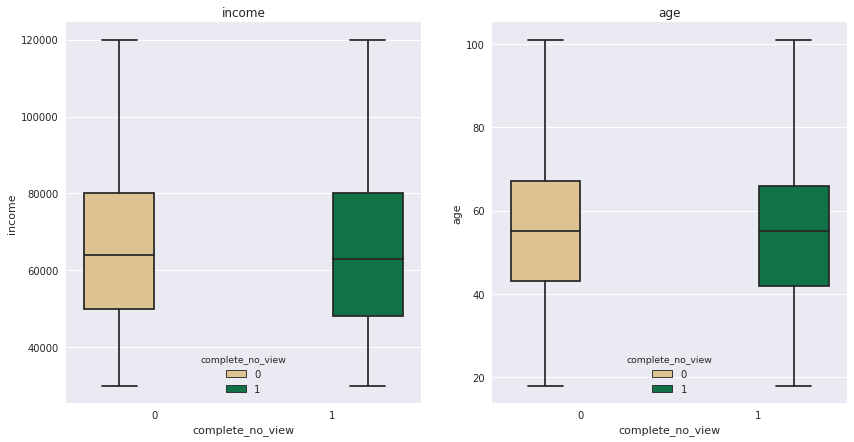

In [41]:
def boxplots(df, variables, hue, n_rows=None, n_cols=None):
    """Draw boxplots to examine complete_no_view behavior of each continuous variable.

    Args:
        df (DataFrame): The DataFrame containing the data.
        variables (list): List of variables to examine.
        hue (str): Variable for grouping the data (default: "complete_no_view").
        n_rows (int, optional): Number of rows in the subplot grid.
        n_cols (int, optional): Number of columns in the subplot grid.

    Returns:
        None
    """
    fig = plt.figure(figsize=(14, 7))
    sns.set(palette=starbucks)
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=var, x=hue, hue=hue, data=df, ax=ax).set_title(var)
    plt.show()

var = ['income', 'age']
boxplots(df=clean_profile, variables=var, hue="complete_no_view", n_rows=1, n_cols=2)

In [42]:
complete_no_view_df = clean_profile[clean_profile['complete_no_view']==1]
complete_yes_view_df = clean_profile[clean_profile['complete_no_view']==0]

Text(0,1,'Comparing the proportion of joining year between completed without viewing and completed with viewing profiles\n')

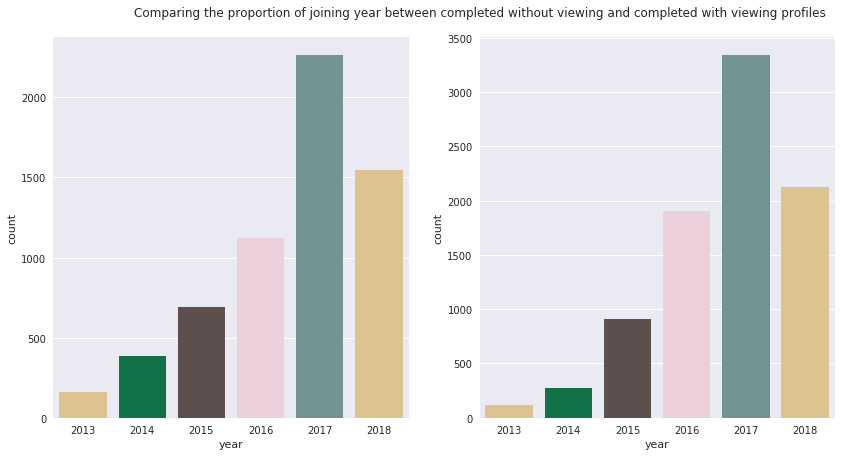

In [43]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the count of complete_no_view profiles by joining year in the first subplot
sns.countplot(x="year", data=complete_no_view_df, palette=starbucks, ax=ax[0])

# Plot the count of complete_yes_view profiles by joining year in the second subplot
sns.countplot(x="year", data=complete_yes_view_df, palette=starbucks, ax=ax[1])

# Set the title of the plot
plt.title("Comparing the proportion of joining year between completed without viewing and completed with viewing profiles\n", x=0)

Text(0,0.98,'Comparing the proportion of genders between complete without view and complete with view profiles')

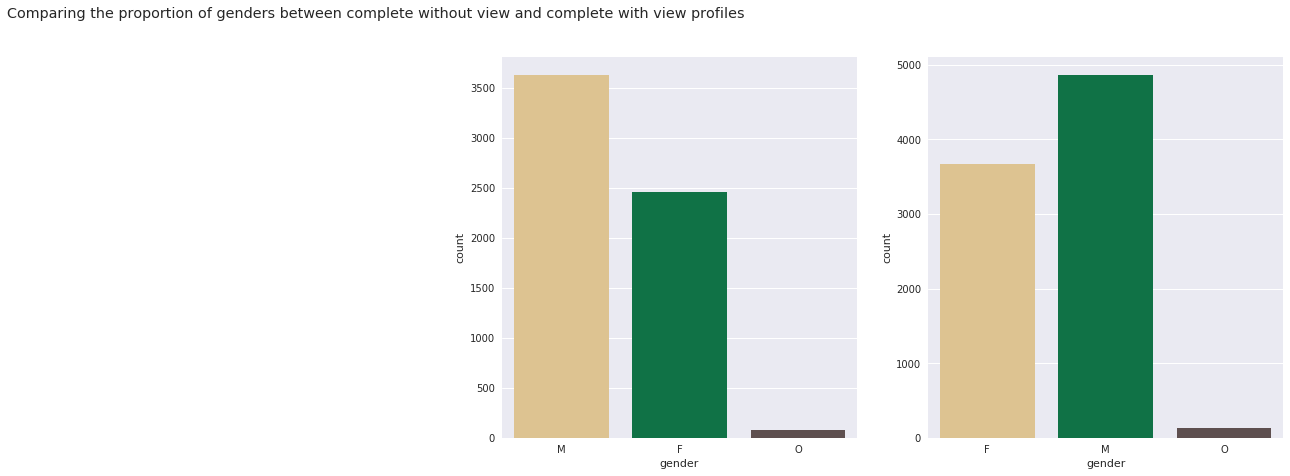

In [44]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot the count of complete_no_view profiles by gender in the first subplot
sns.countplot(x="gender", data=complete_no_view_df, palette=starbucks, ax=ax[0])

# Plot the count of complete_yes_view profiles by gender in the second subplot
sns.countplot(x="gender", data=complete_yes_view_df, palette=starbucks, ax=ax[1])

# Set the title of the plot
plt.suptitle("Comparing the proportion of genders between complete without view and complete with view profiles", x=0)

### 4.4.1. Findings 4:  Demographic Comparison - Accidental Offer Usage<a name="4.4.1."></a>

- There is no significant differences when comparing the demographics of customers who used the offers before viewing them and the rest of the customers.

- This suggests that all customers, regardless of their demographic characteristics, are likely to use the offers accidentally.

### 4.5. Q5: If there is, which type of offer is more likely to be used without being seen?<a name="4.5."></a>

In [45]:
# Offer IDs of the first user-offer interactions that were 'offer received'
first_offer = [received_offer_list[x][1] for x in range(len(received_offer_list))]

# Offer IDs of the second user-offer interactions that were 'offer completed'
second_offer = [completed_offer_list[x][1] for x in range(len(completed_offer_list))]

# Find the common offer IDs and count how many times they appeared
offer_count = Counter(first_offer) & Counter(second_offer)
offer_count

Counter({'ae264e3637204a6fb9bb56bc8210ddfd': 2608,
         '0b1e1539f2cc45b7b9fa7c272da2e1d7': 2714,
         '2906b810c7d4411798c6938adc9daaa5': 2214,
         'fafdcd668e3743c1bb461111dcafc2a4': 1530,
         '4d5c57ea9a6940dd891ad53e9dbe8da0': 2664,
         '9b98b8c7a33c4b65b9aebfe6a799e6d9': 2043,
         'f19421c1d4aa40978ebb69ca19b0e20d': 2143,
         '2298d6c36e964ae4a3e7e9706d1fb8c2': 1584})

In [46]:
def counter_df(counter):
    # Turn the Counter object into a DataFrame
    df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    
    # Rename the columns
    df.rename(columns={'index': 'offer_id', 0: 'count'}, inplace=True)

    # Merge it with the portfolio DataFrame so that we can see what these offers are
    new_df = portfolio.merge(df, left_on='id', right_on='offer_id', how='inner')
    
    # Sort the offers
    new_df.sort_values(by='count', ascending=False, inplace=True)
    return new_df

user_offer_df = counter_df(offer_count)
user_offer_df

,channels,difficulty,duration,id,offer_type,reward,offer_id,count
3,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0b1e1539f2cc45b7b9fa7c272da2e1d7,2714
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,4d5c57ea9a6940dd891ad53e9dbe8da0,2664
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,ae264e3637204a6fb9bb56bc8210ddfd,2608
7,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,2906b810c7d4411798c6938adc9daaa5,2214
6,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,f19421c1d4aa40978ebb69ca19b0e20d,2143
2,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,9b98b8c7a33c4b65b9aebfe6a799e6d9,2043
4,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,2298d6c36e964ae4a3e7e9706d1fb8c2,1584
5,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,fafdcd668e3743c1bb461111dcafc2a4,1530


In [47]:
# Filter the bogo_discount_df DataFrame to select rows where the event is 'offer received'
all_bogo_offer = bogo_discount_df[bogo_discount_df['event'] == 'offer received']

# Count the occurrences of each offer ID in the received_offers DataFrame
all_offer_count = Counter(all_bogo_offer['offer_id'])

# Print the offer counts
all_offer_count

Counter({'9b98b8c7a33c4b65b9aebfe6a799e6d9': 6685,
         'ae264e3637204a6fb9bb56bc8210ddfd': 6683,
         'f19421c1d4aa40978ebb69ca19b0e20d': 6576,
         '2906b810c7d4411798c6938adc9daaa5': 6631,
         'fafdcd668e3743c1bb461111dcafc2a4': 6652,
         '2298d6c36e964ae4a3e7e9706d1fb8c2': 6655,
         '0b1e1539f2cc45b7b9fa7c272da2e1d7': 6726,
         '4d5c57ea9a6940dd891ad53e9dbe8da0': 6593})

In [48]:
# Turn the offer_count Counter object into a DataFrame and merge it with the portfolio DataFrame
all_offer_df = counter_df(all_offer_count)

# Print the resulting DataFrame
all_offer_df

,channels,difficulty,duration,id,offer_type,reward,offer_id,count
3,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0b1e1539f2cc45b7b9fa7c272da2e1d7,6726
2,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,9b98b8c7a33c4b65b9aebfe6a799e6d9,6685
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,ae264e3637204a6fb9bb56bc8210ddfd,6683
4,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,2298d6c36e964ae4a3e7e9706d1fb8c2,6655
5,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,fafdcd668e3743c1bb461111dcafc2a4,6652
7,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,2906b810c7d4411798c6938adc9daaa5,6631
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,4d5c57ea9a6940dd891ad53e9dbe8da0,6593
6,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,f19421c1d4aa40978ebb69ca19b0e20d,6576


In [49]:
# Extract the last three characters of the 'id' column values from the all_offer_df DataFrame
offer_df_label = [x[-3:] for x in all_offer_df['id']]

# Extract the last three characters of the 'id' column values from the user_offers_df DataFrame
user_offer_df_label = [x[-3:] for x in user_offer_df['id']]

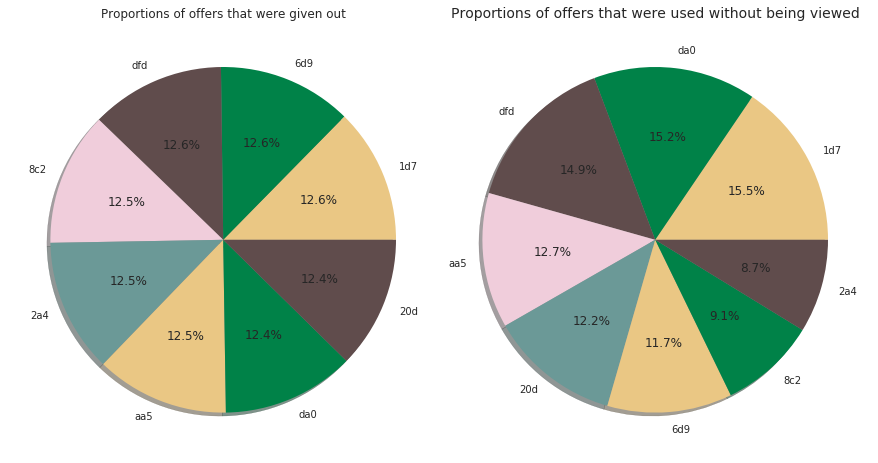

In [50]:
fig = plt.figure()

# Create the first pie chart
ax1 = fig.add_axes([0, 0, 1, 2], aspect=1)
ax1.pie(all_offer_df['count'], labels=offer_df_label, autopct='%1.1f%%', shadow=True)
plt.title('Proportions of offers that were given out')

# Create the second pie chart
ax2 = fig.add_axes([1, .0, 1, 2], aspect=1)
ax2.pie(user_offer_df['count'], labels=user_offer_df_label, autopct='%1.1f%%', shadow=True)
plt.title('Proportions of offers that were used without being viewed', fontsize=14)

plt.show()

### 4.5.1. Findings 5: Offer Effectiveness<a name="4.5.1."></a>

- The design of offer (especially promotion channels and duration) plays a significant role.

- Offers that are promoted through web and email have a higher chance of not being seen by customers.

- Longer duration offers having a higher chance of not being viewed before being used.

- Discount offer type has a greater chance being used without seen compared to the BOGO offer type.

### 5. Modeling: Predicting Customer Behavior<a name="5."></a>

The goal is to build a predictive model that can identify which customers are likely to waste an offer by either 'not using' or 'using without viewing' it. This model will help us target our offers more effectively.

### 5.1. Creating Dataset for Modeling<a name="5.1."></a>

We will create a new dataframe that includes a classification label 'wasted' that refers to refers to offers either not used by the customer or used without being viewed.

In [51]:
# Create a new column 'interacted' in the 'all_df' DataFrame and assign a value of 1 to each row
all_df['interacted'] = 1

# Group the data by 'person', 'offer_id', and 'event' columns and calculate the maximum value of the 'interacted' column for each group
person_all_offer = all_df.groupby(['person', 'offer_id','event'])['interacted'].max().unstack(fill_value=0)

# Create a new column 'wasted' using np.where to indicate whether an offer was wasted or not
person_all_offer['wasted'] = np.where((person_all_offer["offer completed"]==1)&(person_all_offer["offer viewed"]==1), 0, 1)

# Print the resulting DataFrame 'person_all_offer' which contains the interaction status of each person with each offer
# and whether the offer was wasted or not
person_all_offer

event                                                              offer completed  \
person                           offer_id                                            
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5                1   
                                 3f207df678b143eea3cee63160fa8bed                0   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 f19421c1d4aa40978ebb69ca19b0e20d                1   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   
0011e0d4e6b944f998e987f904e8c1e5 0b1e1539f2cc45b7b9fa7c272da2e1d7                1   
                                 2298d6c36e964ae4a3e7e9706d1fb8c2                1   
                                 3f207df678b143eea3cee63160fa8bed                0   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9                1   
0020c2b971eb4e9188eac86d93036a77 4d5c57ea9a6940dd891ad53e9dbe8da0                1   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 ae264e3637204a6fb9bb56bc8210ddfd                0   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   
0020ccbbb6d84e358d3414a3ff76cffd 2298d6c36e964ae4a3e7e9706d1fb8c2                1   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9                1   
                                 f19421c1d4aa40978ebb69ca19b0e20d                1   
003d66b6608740288d6cc97a6903f4f0 0b1e1539f2cc45b7b9fa7c272da2e1d7                1   
                                 3f207df678b143eea3cee63160fa8bed                0   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   
00426fe3ffde4c6b9cb9ad6d077a13ea 0b1e1539f2cc45b7b9fa7c272da2e1d7                0   
                                 2906b810c7d4411798c6938adc9daaa5                0   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   
004b041fbfe44859945daa2c7f79ee64 3f207df678b143eea3cee63160fa8bed                0   
                                 f19421c1d4aa40978ebb69ca19b0e20d                1   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   
004c5799adbf42868b9cff0396190900 ae264e3637204a6fb9bb56bc8210ddfd                1   
...                                                                            ...   
ffe5257abf8840b395e1ee6b29894637 f19421c1d4aa40978ebb69ca19b0e20d                0   
ffeaa02452ef451082a0361c3ca62ef5 2906b810c7d4411798c6938adc9daaa5                1   
                                 5a8bc65990b245e5a138643cd4eb9837                0   
                                 ae264e3637204a6fb9bb56bc8210ddfd                1   
ffed75d3abc64b488982f50ed12878b5 4d5c57ea9a6940dd891ad53e9dbe8da0                0   
                                 ae264e3637204a6fb9bb56bc8210ddfd                0   
fff0f0aac6c547b9b263080f09a5586a 3f207df678b143eea3cee63160fa8bed                0   
                                 4d5c57ea9a6940dd891ad53e9dbe8da0                0   
fff29fb549084123bd046dbc5ceb4faa 4d5c57ea9a6940dd891ad53e9dbe8da0                1   
                                 ae264e3637204a6fb9bb56bc8210ddfd                1   
                                 f19421c1d4aa40978ebb69ca19b0e20d                1   
                                 fafdcd668e3743c1bb461111dcafc2a4                1   
fff3ba4757bd42088c044ca26d73817a 2906b810c7d4411798c6938adc9daaa5                1   
                                 5a8bc65990b

In [52]:
# Create a new DataFrame 'model_df' containing the information needed to build the model
model_df = person_all_offer['wasted']

# Reset the index of 'model_df' for the 'person' and 'offer_id' columns
model_df.reset_index(level=['person', 'offer_id'])

# Convert 'model_df' to a DataFrame and reset the index
model_df = model_df.to_frame().reset_index()

# Print the first few rows of 'model_df'
model_df.head()

,person,offer_id,wasted
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,0


In [53]:
# Merge the 'model_df' DataFrame with the 'clean_profile' DataFrame based on the 'person' column
model_df = model_df.merge(clean_profile, left_on='person', right_on='id', how='left')

# Drop unnecessary columns from the merged DataFrame
model_df.drop(['id','complete_no_view', 'became_member_on'], axis=1, inplace=True)

# Display the first few rows of the merged DataFrame
model_df.head()

,person,offer_id,wasted,age,gender,income,year
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,33,M,72000.0,2017
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,33,M,72000.0,2017
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,33,M,72000.0,2017
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0,33,M,72000.0,2017
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,0,33,M,72000.0,2017


In [54]:
# Merge the 'model_df' DataFrame with the 'portfolio' DataFrame based on the 'offer_id' column
model_df = model_df.merge(portfolio, left_on='offer_id', right_on='id', how='left')

# Drop the unnecessary 'id' column from the merged DataFrame
model_df.drop(['id'], axis=1, inplace=True)

# Display the first few rows of the merged DataFrame
model_df.head()

,person,offer_id,wasted,age,gender,income,year,channels,difficulty,duration,offer_type,reward
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,33,M,72000.0,2017,"[web, email, mobile]",10,7,discount,2
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,33,M,72000.0,2017,"[web, email, mobile]",0,4,informational,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,33,M,72000.0,2017,"[email, mobile, social]",0,3,informational,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0,33,M,72000.0,2017,"[web, email, mobile, social]",5,5,bogo,5
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,0,33,M,72000.0,2017,"[web, email, mobile, social]",10,10,discount,2


In [55]:
# Clean the DataFrame by using the function 'clean_all_categorical' that was defined before
clean_model_df = clean_all_categorical(model_df, ['gender', 'offer_type', 'offer_id'])

# Drop the unnecessary columns from the cleaned DataFrame
clean_model_df.drop(['gender', 'offer_type', 'offer_id', 'channels', 'year'], axis=1, inplace=True)

# Display the first few rows of the cleaned DataFrame
clean_model_df.head()

,person,wasted,age,income,difficulty,duration,reward,gender_id,offer_type_id,offer_id_id,year_id,channel_type_id
0,0009655768c64bdeb2e877511632db8f,1,33,72000.0,10,7,2,0,0,0,4,2
1,0009655768c64bdeb2e877511632db8f,1,33,72000.0,0,4,0,0,1,1,4,2
2,0009655768c64bdeb2e877511632db8f,1,33,72000.0,0,3,0,0,1,2,4,1
3,0009655768c64bdeb2e877511632db8f,0,33,72000.0,5,5,5,0,2,3,4,3
4,0009655768c64bdeb2e877511632db8f,0,33,72000.0,10,10,2,0,0,4,4,3


### 5.2. Model Building and Evaluation using Logistic Regression<a name="5.2."></a>

In [56]:
# Import necessary modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample 5 random rows from the clean_model_df DataFrame
clean_model_df.sample(5)

,person,wasted,age,income,difficulty,duration,reward,gender_id,offer_type_id,offer_id_id,year_id,channel_type_id
49135,e32bcb5eb44445bc8c84394ba2da524d,0,37,67000.0,7,7,3,0,0,6,4,3
12853,3bd3b7ffb14d49f5bc6dac95ede945aa,1,30,41000.0,0,3,0,0,1,2,4,1
29344,87b78dddf0c6444bb3f435a91fcbe238,0,45,47000.0,10,10,2,2,0,4,5,3
5678,1aea6a116ce141f689a3d8651b978ba7,1,76,79000.0,10,5,10,0,2,8,4,3
41250,bdcf61ddb5c1438ca582b718e4a2eee4,1,56,54000.0,5,7,5,2,2,7,0,2


In [57]:
# Check how imbalanced is the dataset
clean_model_df['wasted'].value_counts()

1    31723
0    23499
Name: wasted, dtype: int64

In [58]:
def prepare_data(df):
    """
    Prepare the data for modeling by separating features and labels, and splitting into train and test sets.

    Parameters:
    df (DataFrame): The input DataFrame containing the dataset.

    Returns:
    X_train (DataFrame): The training data features.
    X_test (DataFrame): The testing data features.
    y_train (Series): The training data labels.
    y_test (Series): The testing data labels.
    """
    # Data preparation
    label = df['wasted']
    train = df.iloc[:, 2:].copy()

    # Dividing the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.30, random_state=42)

    return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = prepare_data(clean_model_df)

# Dummy model
first_dummy = DummyClassifier(random_state=42).fit(X_train, y_train)
first_dummy_predict = first_dummy.predict(X_test)
print("Randomly guessing score: {:.2f}".format(first_dummy.score(X_test, y_test)))

second_dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
second_dummy_predict = second_dummy.predict(X_test)
print("Guess all customers will stay score: {:.2f}".format(second_dummy.score(X_test, y_test)))

Randomly guessing score: 0.51
Guess all customers will stay score: 0.57


The output shows the accuracy scores of two dummy classifiers:

- **Randomly guessing score: 0.51**<br>
This dummy classifier randomly guesses the class labels. The accuracy score of 0.51 indicates that it performs slightly better than random chance in predicting the class labels. However, it is not a meaningful predictor and serves as a baseline for comparison.

- **Guess all customers will stay score: 0.57**<br>
This dummy classifier predicts the most frequent class, which in this case customers who "wasted" the offer. The accuracy score of 0.57 indicates that customers will "waste" the offer would be around 57%. This also serves as a baseline for comparison.

The goal is to build models that outperform these baseline scores and provide more meaningful predictions.

In [60]:
def LogReg_model(df):
    """
    Train and evaluate a logistic regression model on the provided dataset.

    Parameters:
    df (DataFrame): The input DataFrame containing the dataset.

    Returns:
    None
    """
    
    # Data preparation and splitting
    X_train, X_test, y_train, y_test = prepare_data(df)

    # Normalizing numerical values
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Hyperparameter tuning
    grid = {"C": np.logspace(-2, 1, 3, 5, 7)}
    logreg = LogisticRegression()
    logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'], refit='precision')
    logreg_cv.fit(X_train, y_train)
    y_pred = logreg_cv.predict(X_test)
    
    # Displaying results
    print("Tuned hyperparameters: (best parameters)", logreg_cv.best_params_)
    print("Precision score:", logreg_cv.best_score_)
    display_results(logreg_cv, y_test, y_pred)


def display_results(cv, y_test, y_pred):
    """
    Display the evaluation results of the model.

    Parameters:
    cv: The fitted GridSearchCV object.
    y_test: The true labels of the test set.
    y_pred: The predicted labels.

    Returns:
    None
    """
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

# Calling the function with the dataset
LogReg_model(clean_model_df)

Tuned hyperparameters: (best parameters) {'C': 7.0}
Precision score: 0.748448084006
Labels: [0 1]
Confusion Matrix:
 [[4581 2493]
 [2108 7385]]
Accuracy: 0.722279229794


### 5.3. Temporary Conclusion (1)<a name="5.3."></a>

1. **The best parameter** showing regularization strength (C) is 7.0, indicates higher value of C corresponds to weaker regularization.


2. **The precision score** is 0.748, indicates it correctly predicted 74.8% of the positive instances (used offers or offers used without viewing) out of all the instances it labeled as positive.


3. **The confusion matrix** reveals:
    - **True negatives:** 4581 (predicted "not wasted" and actually "not wasted")
    - **False negatives:** 2493 (predicted "not wasted" but actually "wasted")
    - **False positives:** 2108 (predicted "wasted" but actually "not wasted")
    - **True positives:** 7385 (predicted "wasted" and actually "wasted")


4. **The accuracy** is 0.722, indicates that it correctly predicted 72.2% of all instances in the dataset.

From these results, we can say that the model more accurate at predicting which offers will be wasted (true positives) rather than which offers will be used (true negatives). This is essential for marketing team because it helps them focus on optimizing resources wisely, and prevent unnecessary expenses by targeting customers who are more likely to waste offers.

### 5.4. Improvements using Downsampling<a name="5.4."></a>

In [61]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = clean_model_df[clean_model_df.wasted == 1]
df_minority = clean_model_df[clean_model_df.wasted == 0]

print("The minority sample size is: {}".format(len(df_minority)))  # 23499

# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False,  # sample without replacement
                                   n_samples=23499,  # to match minority class
                                   random_state=1)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.wasted.value_counts()

The minority sample size is: 23499


1    23499
0    23499
Name: wasted, dtype: int64

In [62]:
# Result after downsampling the dataset
LogReg_model(df_downsampled)

Tuned hyperparameters: (best parameters) {'C': 7.0}
Precision score: 0.754058642843
Labels: [0 1]
Confusion Matrix:
 [[5429 1593]
 [2235 4843]]
Accuracy: 0.728510638298


### 5.5. Temporary Conclusion (2)<a name="5.5."></a>

Overall, downsampling dataset improved precision and performance of logistic regression model for identifying customers who likely waste the offers. However, can we improve further with different approaches or model?

### 5.6. Improvements using LightGBM (Light Gradient Boosting Machine)<a name="5.6."></a>

In [63]:
!pip install lightgbm

In [64]:
clean_model_df['gender_id'] = clean_model_df['gender_id'].astype('category')
clean_model_df['offer_type_id'] = clean_model_df['offer_type_id'].astype('category')
clean_model_df['offer_id_id'] = clean_model_df['offer_id_id'].astype('category')
clean_model_df['year_id'] = clean_model_df['year_id'].astype('category')
clean_model_df['channel_type_id'] = clean_model_df['channel_type_id'].astype('category')

In [65]:
"""
Script for training and evaluating a LightGBM model on a downsampled dataset.

This script performs following steps:
1. Separates majority and minority classes.
2. Downsamples majority class to match minority class.
3. Combines downsampled majority class with minority class to create balanced dataset.
4. Splits dataset into train and test sets.
5. Creates a LightGBM dataset object from training data.
6. Set hyperparameters for the model.
7. Trains LightGBM model on the training data.
8. Makes predictions on the test set and converts them to binary predictions.
9. Evaluates model performance using accuracy, precision, recall, and F1 score.
10. Prints the evaluation metrics.

Usage:
- Make sure you have the necessary libraries installed (lightgbm, sklearn, pandas).
- Preprocess your dataset and ensure the target variable is named 'wasted'.
- Run the script and observe the evaluation metrics printed on the console.

Author: bernalp as Student from Udacity
Capstone Project: Starbucks Challenge
Objective: Improve the accuracy of identifying customers who are likely to waste offers
"""

import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Separates majority and minority classes
df_majority = clean_model_df[clean_model_df.wasted == 1]
df_minority = clean_model_df[clean_model_df.wasted == 0]

print("The minority sample size is: {}".format(len(df_minority)))  # Assuming you have already downsampled the dataset

# Downsamples majority class
df_majority_downsampled = resample(df_majority, replace=False,    # Sample without replacement
                                   n_samples=len(df_minority),  # Match minority class size
                                   random_state=1)  # For reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separate features and target
X = df_downsampled.iloc[:, 2:]  # Assuming your features start from column index 2
y = df_downsampled['wasted']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

The minority sample size is: 23499
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.087054 seconds.
You can set `force_col_wise=true` to remove the overhead.
Accuracy:  0.76
Precision:  0.789661743687
Recall:  0.707124573379
F1 Score:  0.746117488184


### 5.7. Temporary Conclusion (3)<a name="5.7."></a>

1. **Accuracy** 0.76 indicates that model correctly predicted 76% of the instances in the test set.


2. **Precision** 0.7897 indicates that 78.97% of the instances predicted as positive were actually positive. 


3. **Recall** 0.7071 indicates that model identified 70.71% of the positive instances correctly. 


4. **F1 Score** 0.7461 represents the balance between precision and recall.

Overall, LightGBM had higher precision scores and accuracy in predicting both the positive and negative instances. We can say that the model perform better to identify customers who are likely to waste offers.

### 6. Final Conclusions<a name="6."></a>

Based on my analysis of the Starbucks Challenge project, I've arrived at following conclusions and recommendations:

1. Customers with incomplete profiles and those who joined earlier are less likely to use offers. This suggests that targeting efforts should focus on customers with complete profiles and newer members to increase offer utilization.


2. Men are less likely to use offers compared to women, but they show a preference for discount over BOGO. On the other hand, women tend to use BOGO more frequently. Adjust offer types based on gender preferences can improve response rates.


3. Increase promotion through all channels to enhance offer visibility and reach a wider audience.


4. Shorten the offer duration to a 3-7 days to create a sense of urgency and prompting them to take immediate action and make a purchase.


5. Adjust offer difficulty level. If an offer's too difficult, customers may didn't interested engage with it. By creating offers that attainable and rewarding, the company can increase customer participation and encourage more spending.


6. Leverage the potential of discount offers, as the completion rate is 78% among customers who viewed them. By effectively showcasing the benefits of the discount offers and promoting it, customers may encouraged to spend more to take advantage of limited-time discount. This also result increased sales and revenue for the company.

Additionally, based on model's evaluation, it's represent that LightGBM significantly improves prediction performance compared to Logistic Regression and Downsampling. Higher Precision, Accuracy, Recall, and F1 Score demonstrate it's effectiveness in identifying customers likely to waste offers.


### 7. Future Improvements<a name="7."></a>

It's crucial to adopt LightGBM or similar advanced models in future analyses to enhance accuracy and achieve better insights. By incorporate data, explore further model, fine tuning, or alternative tree based models, the overall accuracy and predictive capabilities can be further improved.


### 8. Closure<a name="8."></a>

These conclusions and recommendations provide valuable insights to improve offer strategy, customer engagement, and marketing effectiveness in offer's utilization. These will leading to maximize business ROI (Return of Investments).

### 9. Acknowledgments<a name="9."></a>

- The Datasets used in this project's provided by [Starbucks](https://www.starbucks.com/). Thankyou for their contribution for making this data available for analysis.


- Thankyou for [Udacity](https://www.udacity.com/) "Data Science Nanodegree Program" which granted access to this dataset, also provided valuable knowledge and resources.


- This project's completed by Bernhard A. Alphama.